In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
csv_folder = '../CSV Data'  
csv_files = [os.path.join(csv_folder, f) for f in os.listdir(csv_folder) if f.endswith('.csv')]

df_list = [pd.read_csv(file, low_memory=False) for file in csv_files]

Julyrides_df = pd.concat(df_list, ignore_index=True)
print(f"Combined dataframe shape: {Julyrides_df.shape}")

Combined dataframe shape: (4988053, 13)


In [3]:
Julyrides_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,4DD2787D61CF3241,electric_bike,2025-07-18 17:25:37.739,2025-07-18 17:47:53.285,49 St & 25 Ave,6804.01,48 St & Broadway,6629.06,40.764496,-73.904632,40.755763,-73.912715,casual
1,773CBF1A04FD71AB,electric_bike,2025-07-19 15:28:29.468,2025-07-19 16:04:17.964,Central Park S & 6 Ave,6876.04,5 Ave & E 72 St,7100.07,40.765909,-73.976342,40.772828,-73.966853,casual
2,D68E54237896E734,electric_bike,2025-07-17 23:27:57.316,2025-07-17 23:40:52.640,Leonard St & Church St,5359.11,Liberty St & Broadway,5105.01,40.717571,-74.005549,40.709056,-74.010434,casual
3,925D499017AC875C,electric_bike,2025-07-24 13:37:21.526,2025-07-24 13:44:39.234,Central Park S & 6 Ave,6876.04,5 Ave & E 72 St,7100.07,40.765909,-73.976342,40.772828,-73.966853,casual
4,2E66E951D8461F26,electric_bike,2025-07-27 18:58:50.703,2025-07-27 19:21:55.612,Central Park S & 6 Ave,6876.04,5 Ave & E 72 St,7100.07,40.765909,-73.976342,40.772828,-73.966853,casual


In [4]:
# Convert started_at and ended_at to datetime
Julyrides_df['started_at'] = pd.to_datetime(Julyrides_df['started_at'])
Julyrides_df['ended_at'] = pd.to_datetime(Julyrides_df['ended_at'])

# Calculate ride duration in minutes
Julyrides_df['ride_duration'] = (Julyrides_df['ended_at'] - Julyrides_df['started_at']).dt.total_seconds() / 60

# Filter out rides with negative duration or duration greater than 180 minutes
Julyrides_df = Julyrides_df[(Julyrides_df['ride_duration'] > 0) & (Julyrides_df['ride_duration'] <= 180)]

print(f"Cleaned dataframe shape: {Julyrides_df.shape}")
print(Julyrides_df['ride_duration'].describe())

Cleaned dataframe shape: (4977775, 14)
count    4.977775e+06
mean     1.306685e+01
std      1.241756e+01
min      1.000167e+00
25%      5.511067e+00
50%      9.494400e+00
75%      1.640966e+01
max      1.799747e+02
Name: ride_duration, dtype: float64


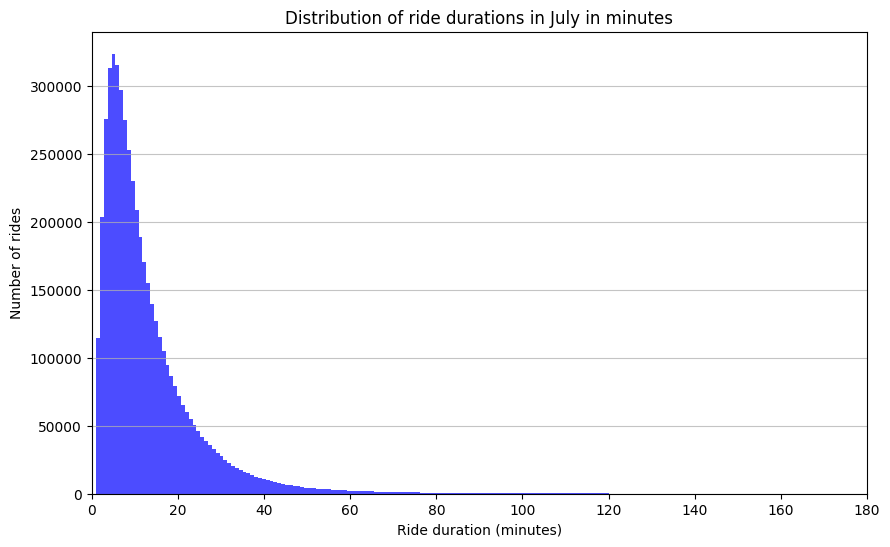

In [5]:
# Plot histogram of ride durations in minutes
plt.figure(figsize=(10,6))
plt.hist(Julyrides_df['ride_duration'], bins=200, color='blue', alpha=0.7)
plt.title('Distribution of ride durations in July in minutes')
plt.xlabel('Ride duration (minutes)')
plt.ylabel('Number of rides')
plt.xlim(0, 180)
plt.grid(axis='y', alpha=0.75)
plt.show()

In [6]:
# Expected ride duration
expected_duration = Julyrides_df['ride_duration'].mean()
print(f"Expected ride duration: {expected_duration:.2f} minutes")

Expected ride duration: 13.07 minutes


In [7]:
# Empirical variance of ride durations
variance_ride_duration = Julyrides_df['ride_duration'].var()
print(f"Empirical variance of ride durations: {variance_ride_duration:.2f} minutes^2")

Empirical variance of ride durations: 154.20 minutes^2


In [8]:
# Probability ride duration longer than 20
rides_longer_than_20 = 0
rides_less_than_20 = 0

for ride_duration in Julyrides_df['ride_duration']:
    if ride_duration >= 20:
        rides_longer_than_20 += 1
    else:
        rides_less_than_20 += 1

prob_ride_longer_than_20 = rides_longer_than_20 /(rides_longer_than_20 + rides_less_than_20)
print(f"Probability ride duration > 20 minutes: {prob_ride_longer_than_20:.2f}")

Probability ride duration > 20 minutes: 0.18


In [9]:
# Probability ride duration longer than 20 given rider is citibike member 
if 'member_casual' in Julyrides_df.columns:
    member_rides = Julyrides_df[Julyrides_df['member_casual'] == 'member']
    rides_longer_than_20_member = 0
    rides_less_than_20_member = 0

    for ride_duration in member_rides['ride_duration']:
        if ride_duration >= 20:
            rides_longer_than_20_member += 1
        else:
            rides_less_than_20_member += 1

    prob_ride_longer_than_20_member = rides_longer_than_20_member / (rides_longer_than_20_member + rides_less_than_20_member)
    print(f"Probability ride duration > 20 minutes for members: {prob_ride_longer_than_20_member:.2f}")

Probability ride duration > 20 minutes for members: 0.14


In [10]:
# Probability that a given ride that is longer than 25 minutes belongs to a citibike member
if 'member_casual' in Julyrides_df.columns:
    rides_longer_than_25 = Julyrides_df[Julyrides_df['ride_duration'] > 25]
    
    total_rides_over_25 = len(rides_longer_than_25)
    
    member_rides_over_25 = len(rides_longer_than_25[rides_longer_than_25['member_casual'] == 'member'])
    
    # Calculate conditional probability
    prob_member_given_over_25 = member_rides_over_25 / total_rides_over_25
    
    print(f"Probability that ride > 25 min belongs to member: {prob_member_given_over_25:.2f}")

Probability that ride > 25 min belongs to member: 0.60


In [11]:
# Expected ride duration of classic and electric bike
classic_rides = Julyrides_df[Julyrides_df['rideable_type'] == 'classic_bike']
electric_rides = Julyrides_df[Julyrides_df['rideable_type'] == 'electric_bike']

expected_duration_classic = classic_rides['ride_duration'].mean()
expected_duration_electric = electric_rides['ride_duration'].mean()

print(f"Expected ride duration for classic bikes: {expected_duration_classic:.2f} minutes")
print(f"Expected ride duration for electric bikes: {expected_duration_electric:.2f} minutes")

Expected ride duration for classic bikes: 12.55 minutes
Expected ride duration for electric bikes: 13.28 minutes


In [12]:
# Save DF 
Julyrides_df.to_pickle('preprocessed_julyrides.pkl')